<a href="https://colab.research.google.com/github/UmaAgrawal501/uma-wasserstoff-AiInternTask/blob/main/text_detection_easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install easyocr
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html
!pip

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2, 2.1.0, 2.1.0+cpu, 2.1.0+cpu.cxx11.abi, 2.1.0+cu118, 2.1.0+cu121, 2.

In [3]:
!pip install --upgrade torch torchvision torchaudio

#Required Library

In [62]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np

#Read Image

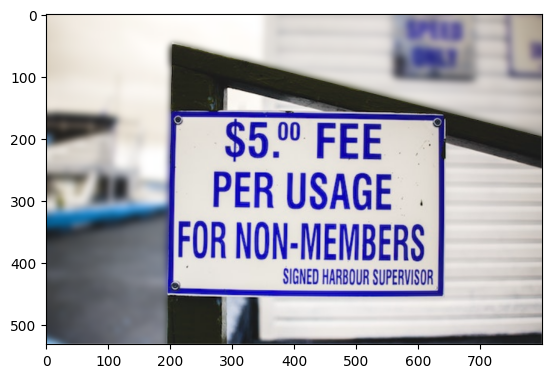

In [55]:
#img_path = '/content/drive/MyDrive/text detection/data.png'
img = cv2.imread('/content/drive/MyDrive/text detection/data2.png')
plt.imshow(img)

#Instance text detecter

In [56]:
reader = easyocr.Reader(['en'], gpu=False)

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

#Detect text on image

In [57]:
text_ = reader.readtext(img)
for t in text_:
  print(t)

([[578, 2], [676, 2], [676, 62], [578, 62]], 'td', 0.03664089932389352)
([[721, 3], [800, 3], [800, 111], [721, 111]], 'L', 0.23430766823872773)
([[277, 161], [554, 161], [554, 246], [277, 246]], 'S5.00 FEE', 0.25528189149974867)
([[259, 243], [571, 243], [571, 327], [259, 327]], 'PER USAGE', 0.9998271787995743)
([[201, 323], [623, 323], [623, 410], [201, 410]], 'FOR NON-MEMBERS', 0.9637149276981685)
([[377, 405], [631, 405], [631, 443], [377, 443]], 'SIGNED HARBOUR SUPERVISOR', 0.9814097648613286)


In [60]:
threshold = 0.25

#Draw bbox and text

([[578, 2], [676, 2], [676, 62], [578, 62]], 'td', 0.03664089932389352)
([[721, 3], [800, 3], [800, 111], [721, 111]], 'L', 0.23430766823872773)
([[277, 161], [554, 161], [554, 246], [277, 246]], 'S5.00 FEE', 0.25528189149974867)
([[259, 243], [571, 243], [571, 327], [259, 327]], 'PER USAGE', 0.9998271787995743)
([[201, 323], [623, 323], [623, 410], [201, 410]], 'FOR NON-MEMBERS', 0.9637149276981685)
([[377, 405], [631, 405], [631, 443], [377, 443]], 'SIGNED HARBOUR SUPERVISOR', 0.9814097648613286)


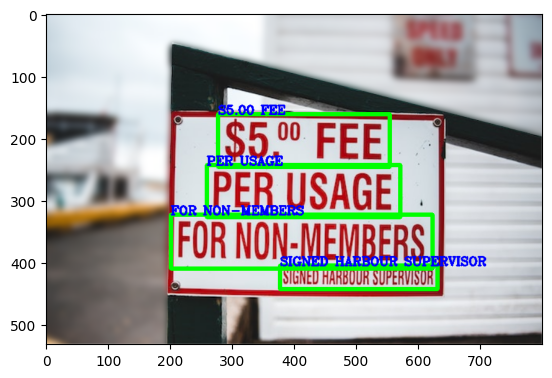

In [61]:
for t_, t in enumerate(text_):
    print(t)

    bbox, text, score = t

    if score > threshold:
        cv2.rectangle(img, bbox[0], bbox[2], (0, 255, 0), 5)
        cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 0.65, (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()